# Library loading

In [48]:
import os
import csv
import numpy as np
import random
import pandas as pd
import time
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt

# Load Data

In [49]:
csv_lines = [] #preallocate list for extracted csv lines

path_to_csv = "data/dataset.csv"

raw_data = pd.read_csv(path_to_csv, sep=';')

# encode as nominal
#raw_data.user.unique(); raw_data.user = raw_data.user.map({'debora':0, 'katia':1, 'wallace':2, 'jose_carlos':3}); raw_data.user.unique()
raw_data.gender.unique(); raw_data.gender = raw_data.gender.map({'Woman':1, 'Man':0}); raw_data.gender.unique()

#raw_data.class.unique(); raw_data.class = raw_data.class.map({'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking:4'}); raw_data.class.unique()


raw_data.head()

B:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


# Replace , with . in data

In [50]:
raw_data['how_tall_in_meters'] = raw_data['how_tall_in_meters'].str.replace(',', '.')
raw_data['body_mass_index'] = raw_data['body_mass_index'].str.replace(',', '.')

raw_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


# check if data have NULL value or not.

In [51]:
raw_data[pd.isnull(raw_data).any(axis=1)]

raw_data.isnull().values.any(); raw_data.isnull().sum().sum()

raw_data.shape

(165633, 19)

In [52]:
raw_data.drop(raw_data[raw_data.z4 == "-14420-11-2011 04:50:23,713"].index.values, inplace=True) # row 122076 -> (165633, 19)
raw_data.z4 = pd.to_numeric(raw_data.z4, errors='raise'); raw_data.dtypes # z4 object -> int64
raw_data.columns

raw_data[pd.isnull(raw_data).any(axis=1)] # show missing column

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
163840,jose_carlos,0,75,1.67,67,NaN,2,96,-126,41,51,-65,3,123,-113,-200,-87,-161,walking
163841,jose_carlos,0,75,1.67,67,NaN,-23,83,-137,-28,105,-131,0,160,-117,-195,-58,-149,walking
163842,jose_carlos,0,75,1.67,67,NaN,-10,87,-145,-25,86,-100,77,12,-84,-186,-87,-139,walking
163843,jose_carlos,0,75,1.67,67,NaN,-17,88,-144,-18,86,-96,0,95,-114,-189,-85,-142,walking
163844,jose_carlos,0,75,1.67,67,NaN,-11,103,-136,-14,92,-93,38,121,-97,-189,-92,-144,walking
163845,jose_carlos,0,75,1.67,67,NaN,14,68,-147,-54,94,-112,86,173,-73,-193,-63,-152,walking
163846,jose_carlos,0,75,1.67,67,NaN,-3,75,-149,-61,104,-118,20,121,-126,-197,-97,-126,walking
163847,jose_carlos,0,75,1.67,67,NaN,-6,77,-147,-3,84,-99,19,125,-122,-210,-76,-154,walking
163848,jose_carlos,0,75,1.67,67,NaN,-4,94,-137,7,61,-97,14,121,-119,-201,-88,-157,walking
163849,jose_carlos,0,75,1.67,67,NaN,6,92,-140,9,76,-27,10,124,-119,-203,-83,-158,walking


In [53]:
# Missing data count

raw_data = raw_data[raw_data['body_mass_index'].notnull()]

raw_data[pd.isnull(raw_data).any(axis=1)]

raw_data.isnull().values.any(); raw_data.isnull().sum().sum()

0

# Analyze data

Chúng ta có thể thấy rằng dữ liệu bị sai lệch. Do đó, để cung cấp dữ liệu đào tạo sạch cho trình phân loại, 10.000 trường hợp từ mỗi lớp được chọn, tức là 7500 trường hợp cho đào tạo và 2500 để kiểm tra. Dữ liệu còn lại có thể được sử dụng làm bộ xác thực

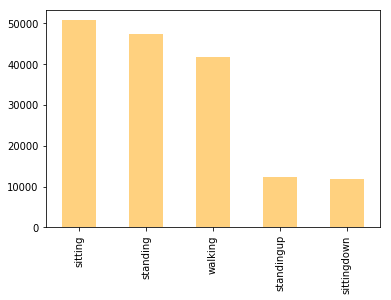

In [54]:
%matplotlib inline
raw_data['class'].value_counts().plot(kind='bar', color='orange', alpha=0.5)

# Create y that contain label of data

In [55]:
y = raw_data['class'].copy()
type(y); y.describe(); y.head(3); y.shape; y.unique() # (165632, )

# y = pd.get_dummies(y, columns=['class'])

y = y.map({'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking':4})

# Drop user and class

In [56]:
raw_data.drop(labels=['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'class'], axis=1, inplace=True); raw_data.shape # (165632, 17)
raw_data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143


# Approaching

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# thang đo MSE, F-measure, precision, recall, accuracy


for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(raw_data.sample(n = 10000, random_state=1), y.sample(n = 10000, random_state=1), test_size=0.30, random_state=7)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape 
    s= time.time()
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    done = time.time() - s
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("Fitting completed in: ", )
    print('MSE = ', mse)
    print(classification_report(y_test, y_pred))

Fitting completed in: 
MSE =  0.18533333333333332
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       938
           1       0.80      0.85      0.82       202
           2       0.96      0.97      0.97       884
           3       0.82      0.76      0.79       228
           4       0.95      0.95      0.95       748

    accuracy                           0.95      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.95      0.95      0.95      3000

Fitting completed in: 
MSE =  0.20166666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       938
           1       0.79      0.83      0.81       202
           2       0.95      0.96      0.96       884
           3       0.80      0.77      0.79       228
           4       0.96      0.94      0.95       748

    accuracy                           0.95      3000
   macro avg       0.90      0.

In [61]:
import pickle

# save the model to disk

filename = 'DCSTree.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))